# Imports.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.ticker import PercentFormatter

# Data loads.

In [ ]:
# global variables
PATH='/content/drive/MyDrive/Colab Notebooks/Project/datasets/'

# Google Drive mount
# drive.mount('/content/drive', force_remount=True)

# Loads
divorce = pd.read_csv(PATH+'divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
books = pd.read_csv(PATH+'clean_books.csv') #, parse_dates=['dteday'], index_col=0)
salaries = pd.read_csv(PATH+'ds_salaries_clean.csv') #, index_col='INSTNM')
unemployment = pd.read_csv(PATH+'clean_unemployment.csv') #, parse_dates=['divorce_date'])
planes = pd.read_csv(PATH+'planes.csv', sep=';')

In [ ]:
divorce.info()
divorce.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2209 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 172.7+ KB


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


# Initial exploration

## Exercise 1.

**Functions for initial exploration**

You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

pandas has been imported for you as pd.

* Use a pandas function to print the first five rows of the unemployment DataFrame.
* Use a pandas function to print a summary of column non-missing values and data types from the unemployment DataFrame.
* Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in unemployment.

In [ ]:
# Print the first five rows of unemployment
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [ ]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [ ]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

## Exercise 2.

**Counting categorical values**

Recall from the previous exercise that the unemployment DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

The unemployment DataFrame has been loaded for you along with pandas as pd.

* Use a pandas function to count the values associated with each continent in the unemployment DataFrame.

In [ ]:
# Count the values associated with each continent in unemployment
print(unemployment.value_counts('continent'))
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
dtype: int64
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: continent, dtype: int64


## Exercise 3.

**Global unemployment in 2021**

It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

The unemployment DataFrame has been loaded for you along with pandas as pd.

* Import the required visualization libraries.
* Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage point in each bin.

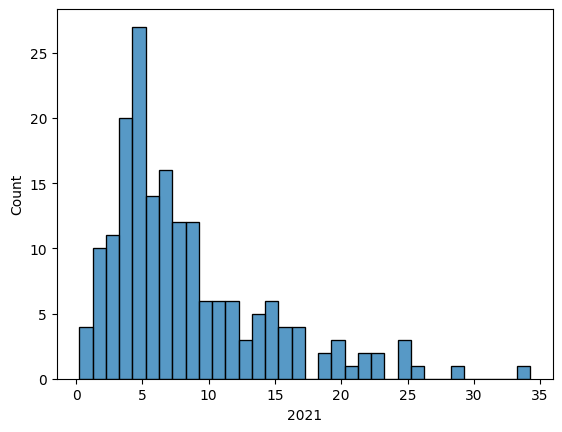

In [ ]:
# Import the required visualization libraries
#import seaborn as sns
#import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

# Data validation

## Exercise 1.

**Detecting data types**

A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.

pandas has been imported as pd; unemployment is also available.

* Update the data type of the 2019 column of unemployment to float.
* Print the dtypes of the unemployment DataFrame again to check that the data type has been updated!

In [ ]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


## Exercise 2.

**Validating continents**

Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!

Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.

The unemployment DataFrame is available, and pandas has been imported as pd.

* Define a Series of Booleans describing whether or not each continent is outside of Oceania; call this Series not_oceania.
* Use Boolean indexing to print the unemployment DataFrame without any of the data related to countries in Oceania.

In [ ]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

## Exercise 3.

**Validating range**

Now it's time to validate our numerical data. We saw in the previous lesson using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

unemployment is available, and the following have been imported for you: Seaborn as sns, matplotlib.pyplot as plt, and pandas as pd.

* Print the minimum and maximum unemployment rates, in that order, during 2021.
* Create a boxplot of 2021 unemployment rates, broken down by continent.

0.26 33.56


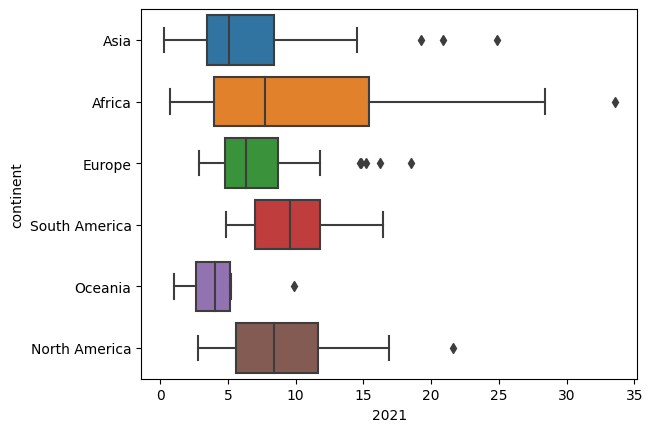

In [ ]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

# Data summarization

## Exercise 1.

**Summaries with .groupby() and .agg()**

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

The unemployment DataFrame is available, and pandas has been imported as pd.

* Print the mean and standard deviation of the unemployment rates for each year.
* Print the mean and standard deviation of the unemployment rates for each year, grouped by continent.

In [ ]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean', 'std']))

# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby(by='continent').agg(['mean', 'std']))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  
                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721

<ipython-input-12-957fdc878f81>:2: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.agg(['mean', 'std']))
<ipython-input-12-957fdc878f81>:5: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby(by='continent').agg(['mean', 'std']))


## Exercise 2.

**Named aggregations**

You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

The unemployment DataFrame is available, and pandas has been imported as pd.

* Create a column called mean_rate_2021 which shows the mean 2021 unemployment rate for each continent.
* Create a column called std_rate_2021 which shows the standard deviation of the 2021 unemployment rate for each continent.

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


## Exercise 3.

**Visualizing categorical summaries**

As you've learned in this chapter, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

unemployment is available, and the following have been imported for you: Seaborn as sns, matplotlib.pyplot as plt, and pandas as pd.

* Create a bar plot showing continents on the x-axis and their respective average 2021 unemployment rates on the y-axis.

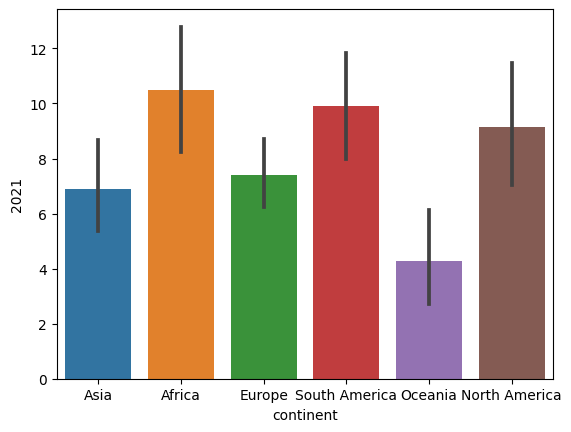

In [ ]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

# Addressing missing data

## Exercise 1.

**Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

* Print the number of missing values in each column of the DataFrame.
* Calculate how many observations five percent of the planes DataFrame is equal to.
* Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
* Use this filter to remove missing values and save the updated DataFrame.

In [ ]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


## Exercise 2.

**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

> import pandas as pd  
> import seaborn as sns  
> import matplotlib.pyplot as plt

* Print the values and frequencies of "Additional_Info".
* Create a boxplot of "Price" by "Airline".
*

Additional_Info             
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
dtype: int64


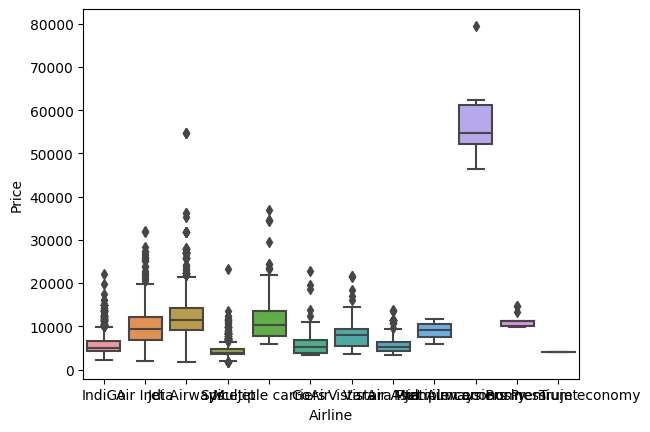

In [ ]:
# Check the values of the Additional_Info column
print(planes[["Additional_Info"]].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

## Exercise 3.

**Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

* Group planes by airline and calculate the median price.
* Convert the grouped median prices to a dictionary.
* Conditionally impute missing values for "Price" by mapping values in the "Airline column" based on prices_dict.
* Check for remaining missing values.

In [ ]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia                              5162.0
Air India                             9443.0
GoAir                                 5135.0
IndiGo                                5000.0
Jet Airways                          11467.0
Jet Airways Business                 54747.0
Multiple carriers                    10197.0
Multiple carriers Premium economy    11269.0
SpiceJet                              3873.0
Trujet                                4140.0
Vistara                               7980.0
Vistara Premium economy               9125.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


# Converting and analyzing categorical data

## Exercise 1.

**Finding the number of unique values**

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

pandas has been imported for you as pd, and the dataset has been stored as planes.

* Filter planes for columns that are of "object" data type.
* Loop through the columns in the dataset.
* Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [ ]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for c in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {c} column: ", non_numeric[c].nunique())

Number of unique values in Airline column:  12
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  128
Number of unique values in Dep_Time column:  222
Number of unique values in Arrival_Time column:  1343
Number of unique values in Duration column:  368
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  10


## Exercise 2.

**Flight duration categories**

As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

> 0        19h  
> 1     5h 25m  
> 2     4h 45m  
> 3     2h 25m  
> 4    15h 30m  
> Name: Duration, dtype: object

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

* Create a list of categories containing "Short-haul", "Medium", and "Long-haul".
* Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h".
* Create medium_flights to capture any values between five and nine hours.
* Create long_flights to capture any values from 10 hours to 16 hours inclusive.

In [ ]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "0h|1h|2h|3h|4h"

# Create medium-haul values
medium_flights = "5h|6h|7h|8h|9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

## Exercise 3.

**Adding duration categories**

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

Additionally, the following packages have been imported: pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.

* Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
* Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
* Create a plot showing the count of each category.

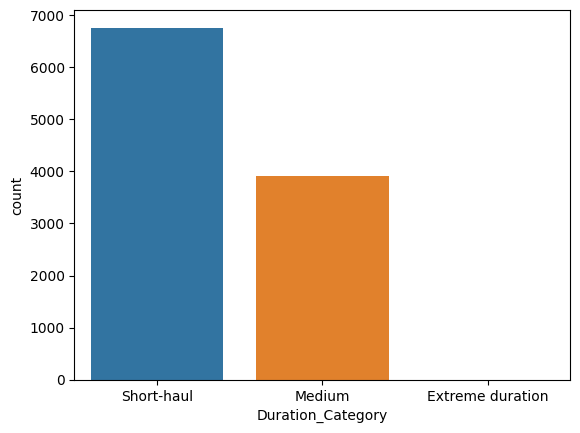

In [ ]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

# Working with numeric data

## Exercise 1.

**Flight duration**

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

* Print the first five values of the "Duration" column.
* Remove "h" from the column.
* Convert the column to float data type.
* Plot a histogram of "Duration" values.

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object
0.05


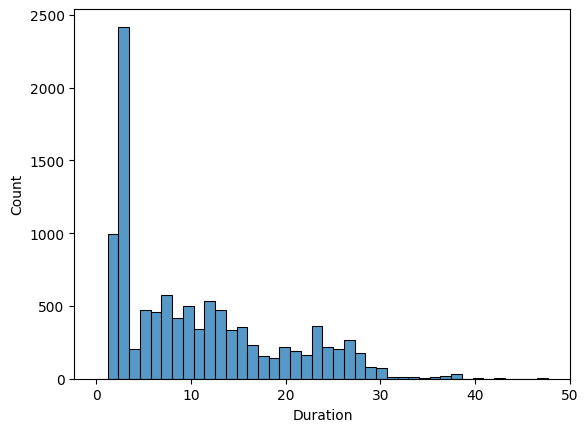

In [ ]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
#planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
#planes["Duration"] = planes["Duration"].astype(float)

# Now this is a PROPER (i.e. MY) data preparation!
planes.iloc[6474,7]="0.05"
print(planes.iloc[6474,7])
planes["Duration"] = planes["Duration"].str.replace("h ", ".")
planes["Duration"] = planes["Duration"].str.replace("h", "")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].astype(float)

def time_recalc(t):
  x, y = divmod(t, 1)
  return x+(y*10/6)

planes['Duration'] = planes['Duration'].apply(time_recalc)

# Plot a histogram
sns.histplot(data=planes, x='Duration')
plt.show()

## Exercise 2.

**Adding descriptive statistics**

Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

* Add a column to planes containing the standard deviation of "Price" based on "Airline".
* Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration".
* Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean".

In [ ]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Airline                            airline_price_st_dev
Jet Airways                        4258.940578             3849
IndiGo                             2264.142168             2053
Air India                          3901.734561             1751
Multiple carriers                  3721.234997             1196
SpiceJet                           1849.922514              818
Vistara                            2914.298578              479
Air Asia                           2027.362290              319
GoAir                              2703.585767              194
Multiple carriers Premium economy  1717.153936               13
Jet Airways Business               11667.596748               6
Vistara Premium economy            2915.405518                3
dtype: int64
Airline                            airline_median_duration
Jet Airways                        13.333333                  3849
IndiGo                             2.916667                   2053
Air India                         

# Handling outliers

## Exercise 1.

**Identifying outliers**

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.

matplotlib.pyplot and seaborn have been imported for you as plt and sns respectively.

* Plot the distribution of "Price" column from planes.
* Display the descriptive statistics for flight duration.

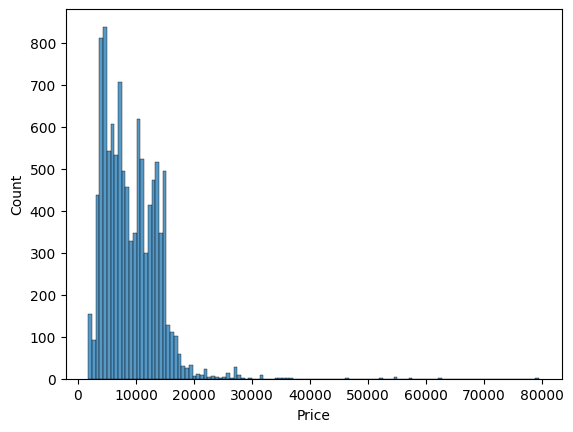

count    10682.000000
mean        10.760750
std          8.477822
min          0.083333
25%          2.833333
50%          8.666667
75%         15.500000
max         47.666667
Name: Duration, dtype: float64


In [ ]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x='Price')
plt.show()

# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

## Exercise 2.

**Removing outliers**

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

pandas has been imported for you as pd, along with seaborn as sns.

* Find the 75th and 25th percentiles, saving as price_seventy_fifth and price_twenty_fifth respectively.
* Calculate the IQR, storing it as prices_iqr.
* Calculate the upper and lower outlier thresholds.
* Remove the outliers from planes.

In [ ]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count    10588.000000
mean      8897.795618
std       4069.289138
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12312.500000
max      23001.000000
Name: Price, dtype: float64


# Patterns over time

## Exercise 1.

**Importing DateTime data**

You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:

> divorce_date          object  
> dob_man               object  
> education_man         object  
> income_man           float64  
> dob_woman             object  
> education_woman       object  
> income_woman         float64  
> marriage_date         object  
> marriage_duration    float64  
> num_kids             float64  

It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

pandas has been imported as pd.

* Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, dob_woman, and marriage_date columns should be imported as DateTime values.

In [ ]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
#divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


## Exercise 2.

**Updating data type to DateTime**

Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

pandas has been imported as pd.

* Convert the marriage_date column of the divorce DataFrame to DateTime values.

In [ ]:
# Convert the marriage_date column to DateTime values
#divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

## Exercise 3.

**Visualizing relationships over time**

Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The divorce DataFrame (with all dates formatted as DateTime data types) has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

* Define a column called marriage_year, which contains just the year portion of the marriage_date column.
* Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.

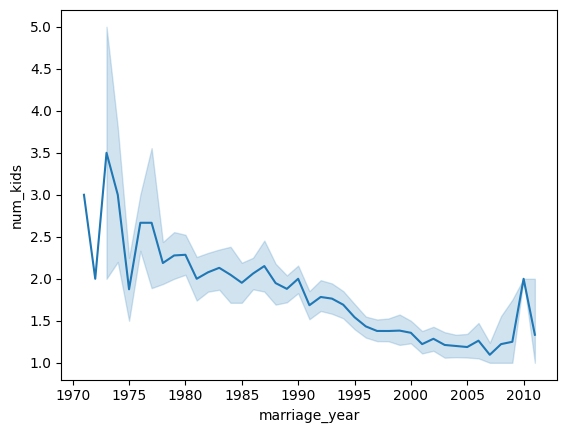

In [ ]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

# Correlation

## Exercise 1.

**Visualizing variable relationships**

In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

* Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.

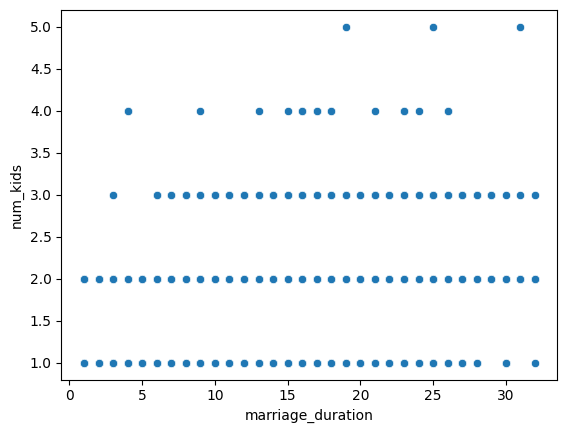

In [ ]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

## Exercise 2.

**Visualizing multiple variable relationships**

Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

* Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.

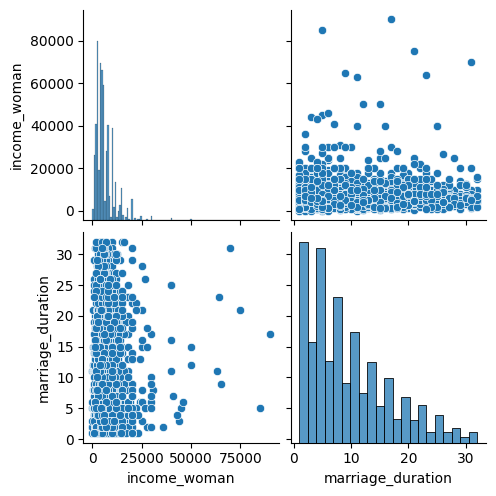

In [ ]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', "marriage_duration"])
plt.show()

# Factor relationships and distributions

## Exercise 1.

**Categorial data in scatter plots**

In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The divorce DataFrame has been loaded for you, and woman_age_marriage has already been defined as a column representing an estimate of the woman's age at the time of marriage. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

* Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.

In [ ]:
# Data preparation (dob = date of birth):

divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

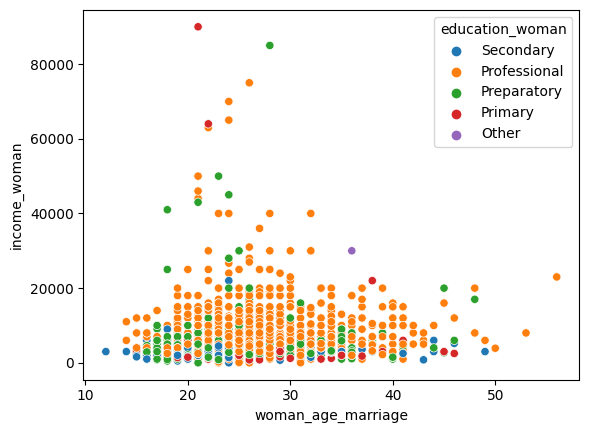

In [ ]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

## Exercise 2.

**Exploring with KDE plots**

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

The divorce DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the num_kids column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

* Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids.
* Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.
* Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.

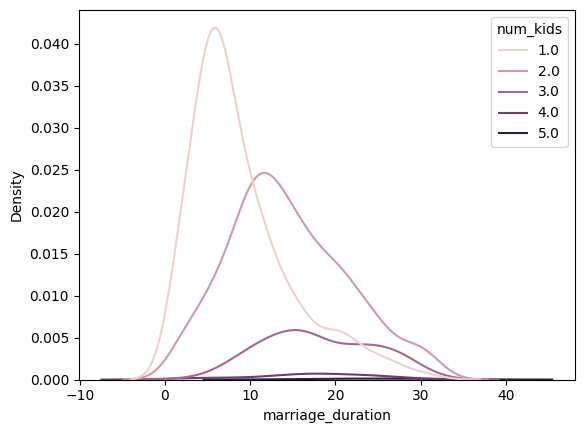

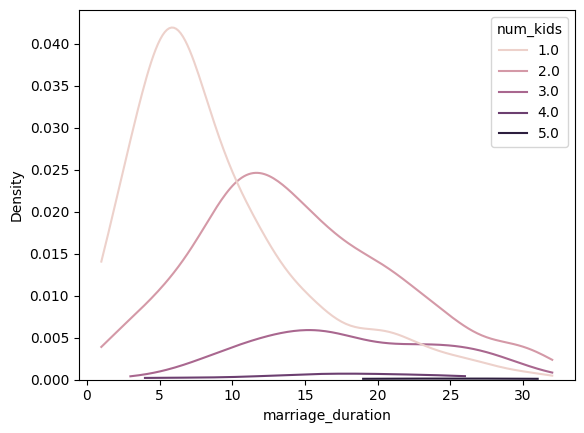

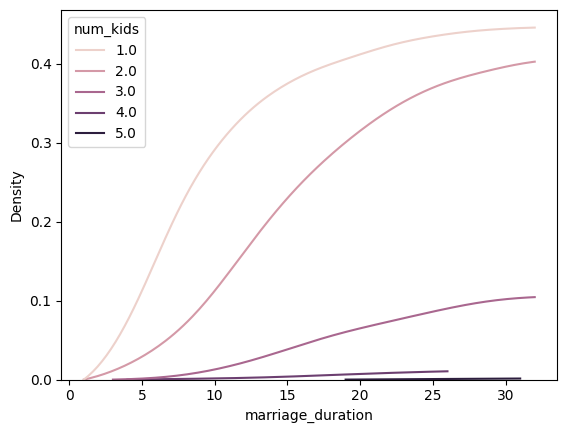

In [ ]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

# Considerations for categorical data

## Exercise 1.

**Checking for class imbalance**

The [2022 Kaggle Survey](https://www.kaggle.com/kaggle-survey-2022) captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

> Job Category	Relative Frequency  
Data Science	0.281236  
Data Analytics	0.224231  
Other	0.214609  
Managerial	0.121300  
Machine Learning	0.083248  
Data Engineering	0.075375

Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

* Print the relative frequency of the "Job_Category" column from salaries DataFrame.

In [ ]:
# Data preparation:

job_categories = ['Data Science', 'Data Analytics', 'Data Engineering', 'Machine Learning', 'Managerial', 'Consultant']

data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

salaries['Job_Category'] = np.select(conditions, job_categories, default="Other")

In [ ]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: Job_Category, dtype: float64


## Exercise 2.

**Cross-tabulation**

Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

pandas has been imported for you as pd.

* Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".
* Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.
* Update pd.crosstab() to return the mean "Salary_USD" values.

In [ ]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22
Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6
Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888889  116668.971963  85645.285714
Data Science      107865.303571  121664.888889  70426.869565
Machine Learning  123878.520000  100849.480000  85124.954545
Managerial        170102.857143  160419.454545  98976.333333
Other              963

# Generating new features

## Exercise 1.

**Extracting features for correlation**

In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as sns, pandas as pd, and matplotlib.pyplot as plt.

* Extract the month from "date_of_response", storing it as a column called "month".
* Create the "weekday" column, containing the weekday that the participants completed the survey.
* Plot a heat map, including the Pearson correlation coefficient scores.

<ipython-input-36-e6336b57591e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salaries.corr(), annot=True)


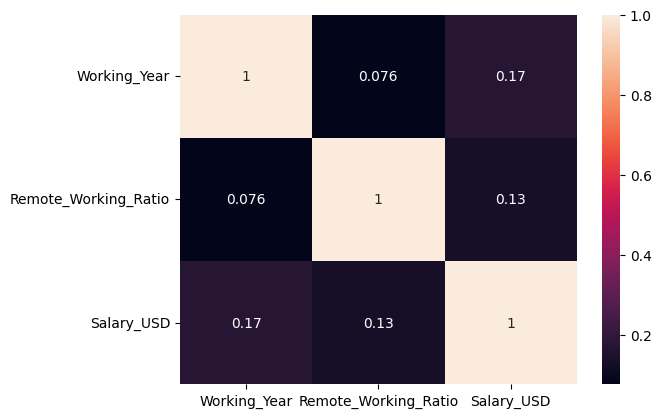

In [ ]:
# Get the month of the response
#salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
#salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

## Exercise 2.

**Calculating salary percentiles**

In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

pandas has been imported as pd and the salaries dataset read in as DataFrame called salaries.

* Find the 25th percentile of "Salary_USD".
* Store the median of "Salary_USD" as salaries_median.
* Get the 75th percentile of salaries.

In [ ]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


## Exercise 3.

**Categorizing salaries**

Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

* Create salary_labels, a list containing "entry", "mid", "senior", and "exec".
* Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD".
* Split "Salary_USD" based on the labels and ranges you've created.
* Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.

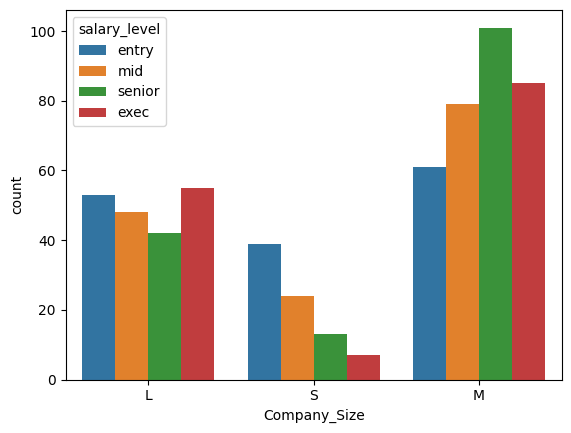

In [ ]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

# Generating hypotheses

## Exercise 1.

**Comparing salaries**

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

The salaries DataFrame has been imported as a pandas DataFrame.

pandas has been imported as pd, maplotlib.pyplot as plt and seaborn as sns.

* Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
* Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".

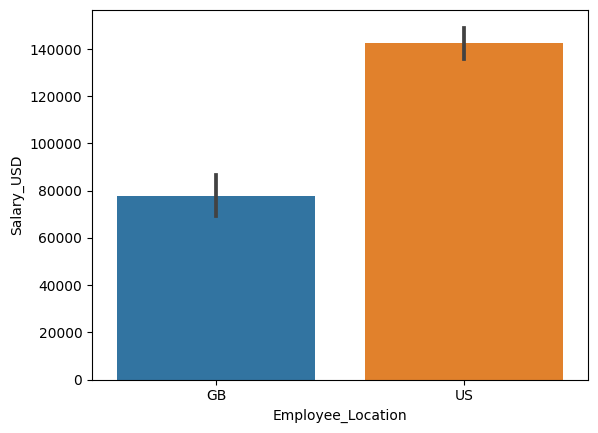

In [ ]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

## Exercise 2.

**Choosing a hypothesis**

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

> Value	Meaning  
CT	Contractor  
FL	Freelance  
PT	Part-time  
FT	Full-time

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

* Produce a barplot comparing "Salary_USD" by "Company_Size", factoring "Employment_Status".

Question: What is a reasonable hypothesis to generate based on this plot?
Answer: On average, large companies pay contractors more than medium-sized companies.

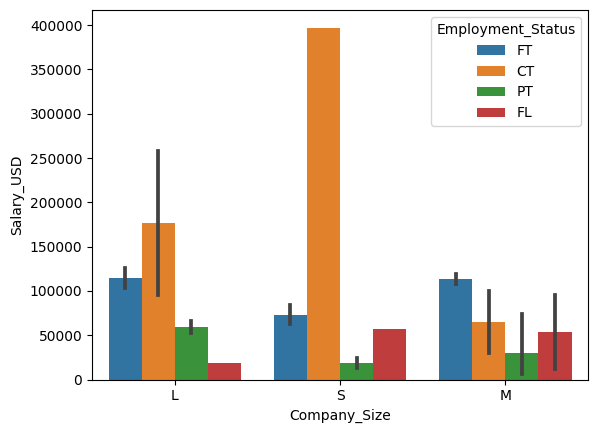

In [ ]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()